Text(0, 0.5, 't')

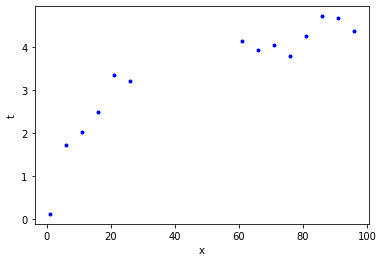

In [15]:
# Data loader - DO NOT MODIFY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:,1].reshape((-1,1))
t = df[:,2].reshape((-1,1))
# x and t are 2d arrays of shape (N,1) where N is the number of data points
plt.figure()
plt.plot(x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')

Order & Train & Valid\\
0 & 1.255 & 1.282
1 & 0.575 & 0.814
2 & 0.413 & 0.675
3 & 0.197 & 0.418
4 & 0.151 & 0.546
5 & 0.125 & 0.724


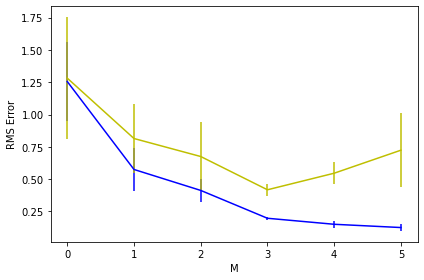

In [16]:
# Construct the dataset
# the combined data for cross-validation 11 pts: 1,11,16,21,26,61,71,76,86,91,96
xtrainval = [1,11,16,21,26,61,71,76,86,91,96]
ttrainval = [0.117,2.021,2.489,3.348,3.215,4.141,4.047,3.805,4.722,4.691,4.388]
# a test set of 3 pts: 6,66,81
xtest = [6,66,81]
ttest = [1.721,3.929,4.271]

np.random.seed(1200)

# First, combine the x and t data into a single array
trainval = np.concatenate([np.atleast_2d(xtrainval).T,np.atleast_2d(ttrainval).T],axis=1)

# Randomise the order
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.
Folds = [ trainval[0:4], trainval[4:8], trainval[8:11] ]

M = [0,1,2,3,4,5] # max polynomial order set to 3 because the training 
K = 3 # number of folds

rmstrain = [] # error on the training folds
rmsvalid = [] # RMS error on the validation fold
stdtrain = [] # standard deviation over the training sets
stdvalid = [] # standard deviation over the validation sets

for i in M:
    # Record the performance on the folds
    train_loss = []
    validation_loss = []
    
    for j in range(K):
        # Select the one validation fold
        Valid = Folds[j]       
        # Select and combine the K-1 training folds
        Train = np.concatenate(Folds[:j]+Folds[j+1:])                       
        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:,0],j) for j in range(0,i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:,0],j) for j in range(0,i+1)]).transpose()        
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),Train[:,1]))
        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:,1]-np.matmul(PhiValid,w),2))))        
    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss)) 

plt.figure()
plt.errorbar(M,rmstrain,fmt='b-',yerr=stdtrain,label="Train")
plt.errorbar(M,rmsvalid,fmt='y-',yerr=stdvalid,label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('cross-validation-loss.png')
# print(w)
# print(PhiTrain)
# print(PhiValid)
# print(xtrainval)
# print(ttrainval)
print("Order & Train & Valid\\\\")
for i in M:
    print(f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f}")

the optimal model is cubic(it has the fewest validation)

[-3.013e-03  2.107e-01 -3.497e-03  1.891e-05]
Training loss = 0.237
Test loss = 0.356


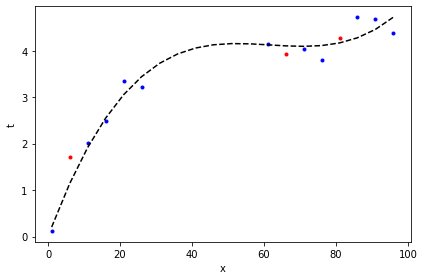

In [17]:
x = [1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96]

polyorder = 3
PhiTrain = np.array([pow(np.array(xtrainval),j) for j in range(0,polyorder+1)]).transpose()
PhiTest = np.array([pow(np.array(xtest),j) for j in range(0,polyorder+1)]).transpose()

hiPhi = np.array([pow(np.array(x),j) for j in range(0,polyorder+1)]).transpose()

# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),np.array(ttrainval)))
# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
ytest = np.matmul(PhiTest,w)
# compute the RMS error
training_loss = np.sqrt(np.sum(pow(np.array(ttrainval)-ytrain,2)/np.array(xtrainval).size))
test_loss = np.sqrt(np.sum(pow(np.array(ttest)-ytest,2)/np.array(xtest).size))
optimal_w = w
for i in range(4):
    optimal_w[i] = "%.3e" % optimal_w[i]
print(optimal_w)

print(f"Training loss = {training_loss:.3f}")
print(f"Test loss = {test_loss:.3f}")
# print(w)
# print(PhiTrain)
# print(ttrainval)


# Plot the data
plt.figure()
plt.plot(xtrainval,ttrainval,'b.')
plt.plot(xtest,ttest,'r.')
# plt.plot(x,h(x),'k-')
plt.plot(np.array(x),np.matmul(hiPhi,w),'k--')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.savefig('cross-validation-result.png')


In [18]:
x_missing = [31, 36, 41, 46, 51, 56]
PhiTrain_x = np.array([pow(np.array(x_missing),j) for j in range(0,polyorder+1)]).transpose()
t_missing = np.matmul(PhiTrain_x,w)
# print(PhiTrain_x)
print(t_missing)

[3.73141781 3.93233996 4.06052611 4.13015876 4.15542041 4.15049356]


# Question 1

a). The optimal degree is 3, and the parameters are [-3.013e-03  2.107e-01 -3.497e-03  1.891e-05]                                                                                             
b). graph see above                                                                                                                                                           
When M = 3, the test loss is 0.356 which is similar to the Validation 0.418, so i think it can well generalise well to the unseen data                                        
c). for x = 31, t = 3.731,                                                                                                                                                    
        x = 36, t = 3.932,                                                                                                                                                    
        x = 41, t = 4.061,                                                                                                                                                    
        x = 46, t = 4.130,                                                                                                                                                    
        x = 51, t = 4.155,                                                                                                                                                    
        x = 56, t = 4.150 (t to 3 decimal places)                                                                                                                             

In [19]:
# np.random.seed(123456)
# Npts = 14
sigma = 0.1
alpha = 2.0
beta = (1/sigma)**2
m0 = np.zeros(optimal_w.size)
s0 = (1/alpha) * np.eye(optimal_w.size)
# print(m0)
# print(s0)

# np.random.seed(1234)

# First, combine the x and t data into a single array
trainval_all = np.concatenate([np.atleast_2d(xtrainval + xtest).T,np.atleast_2d(ttrainval + ttest).T],axis=1)
# Randomise the order
trainval_all = np.random.permutation(trainval_all)
# print(trainval_all)

Phi = np.array([[pow(x,j) for j in range(0,polyorder+1)] for x in trainval_all[:,0]])
# Solve the normal equations using a standard solver
w_m = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),np.array(trainval_all[:,1])))
# print(Phi)
invS0 = alpha * np.eye(optimal_w.size)
invSN = invS0 + beta * np.matmul(Phi.T, Phi)
SN = np.linalg.inv(invSN)
mN = np.squeeze(beta * np.matmul(SN, np.matmul(Phi.T, trainval_all[:,1])))

alpha1 = 0.0000000000001
invS0AlphaEq0 = alpha1 * np.eye(optimal_w.size)
invSN_alphaEq0 = invS0AlphaEq0 + beta * np.matmul(Phi.T, Phi)
SN_AlphaEq0 = np.linalg.inv(invSN_alphaEq0)
mN_AlphaEq0 = np.squeeze(beta * np.matmul(SN_AlphaEq0, np.matmul(Phi.T, trainval_all[:,1])))

# print(invS0)
# print(invS0AlphaEq0)
# print(f"covariance = {SN}")
print(f"mean = {mN}")
print(f"w* = {w_m}")
# print(f"when Alpha =0,covariance = {SN_AlphaEq0}")
print(f"when Alpha close to 0, mean= {mN_AlphaEq0}")  

mean = [ 2.39746101e-01  1.96053847e-01 -3.27556735e-03  1.79472387e-05]
w* = [ 2.43132765e-01  1.95766033e-01 -3.26985716e-03  1.79147545e-05]
when Alpha close to 0, mean= [ 2.43132765e-01  1.95766033e-01 -3.26985716e-03  1.79147545e-05]


# Question 2

a&b). From the given values of parameters m0,S0 and alpha, and the equation of posterior mean: $ mN = \beta S_N \phi^T t $, and $ S_N^-1 = \alpha I + \beta \phi^T \phi $. Also from the equation $ \phi^T t - \phi^T \phi w* = 0 $ where w* is the maximum likelihoood estimate, then we can get the values of w* and mN from above code,we can assume that $ w_N \approx w^* $                                    
                                                                                                                                                                           
c). for the equation $ \phi^T \phi m_N = \phi^T t $ and the values of w* and mN_AlphaEq0 show above, we can assume that when $ \alpha = 0 $(infinitely close to 0 in code), the maximum likelihood estimate be identical to the mean of the posterior 

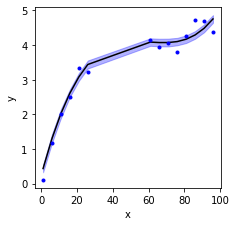

In [20]:
plt.figure(figsize=[9,9])

# npts = 14
x = [1,6,11,16,21,26,61,66,71,76,81,86,91,96]
t =  [0.117,1.172,2.021,2.489,3.348,3.215,4.141,3.929,4.047,3.805,4.271,4.722,4.691,4.388]

invS0 = alpha * np.eye(optimal_w.size)
invSN = invS0 + beta * np.matmul(Phi.T, Phi)
SN = np.linalg.inv(invSN)
mN = np.squeeze(beta * np.matmul(SN, np.matmul(Phi.T, t)))

b = np.array([pow(np.array(x),i) for i in range(0,polyorder+1)]).transpose()
t_pre = np.matmul(b, w_m)

sigmasq = (1/beta) + np.diag(np.matmul(Phi,np.matmul(SN,Phi.T)))
x_reshape = np.array(x).reshape(1,-1)
x_reshape = np.squeeze(x_reshape)

# print(x_reshape)
b = np.array([pow(np.array(x),i) for i in range(0,polyorder+1)]).transpose()
t_pre = np.matmul(b, w_m)

# print(mN)

plt.subplot(3,3,i+1)
plt.plot(x,t_pre,'k-')
plt.plot(np.squeeze(x),np.squeeze(t),'b.')
y = np.matmul(Phi,mN)
# plt.plot(x,y,'r--')
plt.fill_between(x_reshape,t_pre-np.sqrt(sigmasq), t_pre+np.sqrt(sigmasq),color='blue',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
# plt.title(f'N={npts}')
plt.tight_layout()
plt.savefig('bayesianprediction.png')



In [22]:
x = [101,106,111,116,120]
b = np.array([pow(np.array(x),i) for i in range(0,polyorder+1)]).transpose()
t_pre = np.matmul(b, w_m)
print (t_pre)

[5.11727874 5.59097652 6.18602604 6.91586336 7.60580947]


[ 3.29425875e-02  2.07026084e-01 -3.43643531e-03  1.86518224e-05]


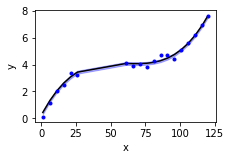

In [137]:
x1 = [1,6,11,16,21,26,61,66,71,76,81,86,91,96,101,106,111,116,120]
t1 =  [0.117,1.172,2.021,2.489,3.348,3.215,4.141,3.929,4.047,3.805,4.271,4.722,4.691,4.388,5.117,5.591,6.186,6.916,7.606]

Phi_p = np.array([[pow(x,j) for j in range(0,polyorder+1)] for x in np.array(x1)])
invS0 = alpha * np.eye(optimal_w.size)
invSN = invS0 + beta * np.matmul(Phi_p.T, Phi_p)
SN = np.linalg.inv(invSN)
mN = np.squeeze(beta * np.matmul(SN, np.matmul(Phi_p.T, t1)))

b = np.array([pow(np.array(x1),i) for i in range(0,polyorder+1)]).transpose()
t_pre = np.matmul(b, w_m)

sigmasq = (1/beta) + np.diag(np.matmul(Phi_p,np.matmul(SN,Phi_p.T)))
x1_reshape = np.array(x1).reshape(1,-1)
x1_reshape = np.squeeze(x1_reshape)

# print(x_reshape)
b = np.array([pow(np.array(x1),i) for i in range(0,polyorder+1)]).transpose()
t_pre = np.matmul(b, w_m)

print(mN)

plt.subplot(2,2,i+1)
plt.plot(x1,t_pre,'k-')
plt.plot(np.squeeze(x1),np.squeeze(t1),'b.')
y = np.matmul(Phi_p,mN)
# plt.plot(x,y,'r--')
plt.fill_between(x1_reshape,t_pre-np.sqrt(sigmasq), t_pre+np.sqrt(sigmasq),color='blue',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
# plt.title(f'N={npts}')
plt.tight_layout()
plt.savefig('bayesianprediction.png')


# Question 3

a).See above graphic1 for Q3                                                  
b).See above graphic2 for Q3
When predicting the future t, the data increase rapidly than before.
The mean is [ 3.29425875e-02  2.07026084e-01 -3.43643531e-03  1.86518224e-05]
And the prediction on day 120 is around 7.606.